<div class = "alert alert-warning" style= "color:black">
    <h2>Activity 5 (Stretch) : Understanding the role of pre-processing</h2>
    This is an additional activity for those of you who have made rapid progress.
</div>
<div class = "alert alert-warning" style= "color:black">
    <h3> Activity 5.1: Investigate the effect of differently scaled data</h3>
 <b>First</b> we will investigate what could happen if your measurements are in different units,  so one feature has values spanning a bigger range. <ul>
        <li> Make a copy of the iris data and convert the second  feature from cm to mm, <br> 
        You can create the version of the data using code like: <code>  irisXscaled = copy.deepcopy(irisX)</code><br>
        Then multiply the values in one column by ten like: <code> irisXscaled [:, 1:2] *=10 </code>
    </li>
   <li> Rerun kMeans on the new data (for your preferred number of clusters) and visualisation to see what difference it makes <br>
       You will need to  select some of the columns and pass them into your graphing code in the same way you did for the irisX data.</li>
    </ul>
</div>

In [6]:
from sklearn import datasets
import numpy as np

# Load iris dataset
iris = datasets.load_iris()
irisX = iris.data


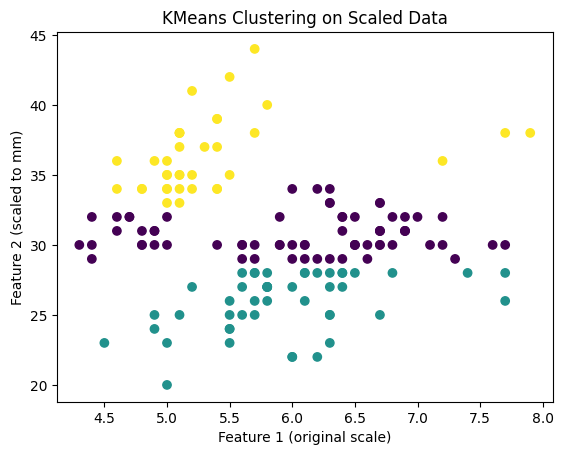

In [7]:
import copy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. put your code to change the data here (you could print the first few rows of data to see the effect of scaling)
irisXscaled = copy.deepcopy(irisX)
irisXscaled[:, 1:2] *= 10

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXscaled in three places
kmeans_scaled = KMeans(n_clusters=3, n_init=10)
kmeans_scaled.fit(irisXscaled)
irisClusterScaled = kmeans_scaled.labels_

# 3. then put your visualisation code here - but select x and y from irisXscaled instead of irisX
x = irisXscaled[:, 0]
y = irisXscaled[:, 1]
plt.scatter(x, y, c=irisClusterScaled, cmap='viridis')
plt.xlabel("Feature 1 (original scale)")
plt.ylabel("Feature 2 (scaled to mm)")
plt.title("KMeans Clustering on Scaled Data")
plt.show()

<div class = "alert alert-warning" style= "color:black">
<h3> Activity 5.2: Using preprocessing so all the features have equal importance in kMeans distance calculations. </h3> 
Read the explanation below then: <ol>
    <li> <b>Add</b> the following lines to your code to get the preprocessed data.<br>
     <code>  scaler = sklearn.preprocessing.MinMaxScaler()
  scaler.fit(irisX)
  irisXnormalised = scaler.transform(irisX)</code>
    </li>
    <li> <b>Rerun </b> the clustering then visualisation for this normalised data and observe the difference.
    </ol>
  </div>

 ### Explanation
 As well as classes for different types of models, sklearn provides many preprocessing classes.  
Like models these implement a 'fit()' method,  but instead of `predict()' they have a 'transform()' method. 

A common way to make each feature equally important is to transform each one so that its values lie between 0 and 1.   
Assuming as usual  we store our set of examples as rows in an array X, with a  column for each features.  
For each individual feature j (column in X) it: 
- finds the highest  and lowest  values in column j of X
- uses these to calculate  the *range* of values in the column range(X[,j]) = max(X[,j] - min(X[,j])  
- subtracts the min(X[,j]) from each value so that they now all start from 0 and the highest value is now max(X[,j] - min(X[,j])
- divide each value by the range(X[,j]) so the upper value  is now 1

If you're feeling confident about numpy arrays and data slicing you could try implementing this your self using a loop over each column (X.shape[1]) and doing slicing making calls to numpy's min(), max() functions.  
There's some clues here:  https://stackoverflow.com/questions/12701659/finding-range-of-a-numpy-array-elements

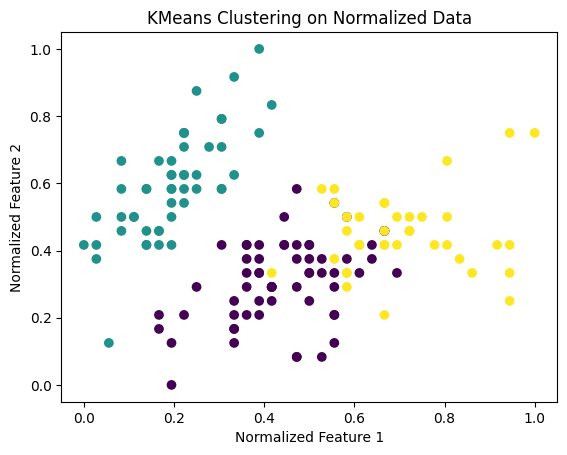

In [8]:
import copy, sklearn
# 1. put your code to change the data here (you could print the first few rows of data to see the effect of normalising)
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(irisX)
irisXnormalised = scaler.transform(irisX)

# 2. then put the four lines of code that create a kmeans object and run clustering   here - changing irisX to irisXnormalised in two plces
kmeans_norm = KMeans(n_clusters=3, n_init=10)
kmeans_norm.fit(irisXnormalised)
irisClusterNorm = kmeans_norm.labels_

# 3. then put your visualisation code here - but select x and y from irisXnormalised instead of irisX
x = irisXnormalised[:, 0]
y = irisXnormalised[:, 1]
plt.scatter(x, y, c=irisClusterNorm, cmap='viridis')
plt.xlabel("Normalized Feature 1")
plt.ylabel("Normalized Feature 2")
plt.title("KMeans Clustering on Normalized Data")
plt.show()

**Decide for yourself which of the three sets of visualisation is clearer**  
Having filled in and run the cell above,  run the cell below and answer the questions to check your understanding

In [ ]:
import workbook5_mcq
from IPython.display import display
display(workbook5_mcq.Q5)
display(workbook5_mcq.Q6)